In [27]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

sb.set()

In [28]:
stockCSV = pd.read_csv('stockdata.csv')

In [29]:
print("Data type : ", type(stockCSV))
print("Data dims : ", stockCSV.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (2518, 10)


In [30]:
stockCSV['Foodsum'] = stockCSV['KE=F']+stockCSV['ZR=F']

In [31]:
stockCSV = stockCSV.dropna(how='any') #Cleaning Null Values

In [32]:
stockCSV['Foodsum'] = stockCSV['Foodsum'].round(3)
stockCSV['CL=F'] = stockCSV['CL=F'].round(3)
stockCSV['NG=F'] = stockCSV['NG=F'].round(3)
stockCSV['SQM'] = stockCSV['SQM'].round(3)

stockCSV['GC=F'] = stockCSV['GC=F'].round(3)
stockCSV['ZF=F'] = stockCSV['ZF=F'].round(3)
stockCSV['BRK-A'] = stockCSV['BRK-A'].round(3)
stockCSV['TSLA'] = stockCSV['TSLA'].round(3)

In [33]:
Wheat = pd.DataFrame(stockCSV['KE=F'])
Rice = pd.DataFrame(stockCSV['ZR=F'])
Food = pd.DataFrame(stockCSV['Foodsum'])

Crude = pd.DataFrame(stockCSV['CL=F'])
Nat = pd.DataFrame(stockCSV['NG=F'])

Fert = pd.DataFrame(stockCSV['SQM'])

Gold = pd.DataFrame(stockCSV['GC=F'])
Bonds = pd.DataFrame(stockCSV['ZF=F'])

Berkshire = pd.DataFrame(stockCSV['BRK-A'])
Tesla = pd.DataFrame(stockCSV['TSLA'])

Date = pd.DataFrame(stockCSV['Date'])

# Machine Learning (1)
### via Linear Regression

Initially, we used linear regression to predict the prices of food because our data is numeric in nature.
However, because the values are from a time series dataset, we realise that linear regression by itself would be an inaccurate model
The values in times series data are correlated with themselves and as such, a different model would be a better predictor

In [34]:
def LinRegression (predictor,response, testSize = 0.2,SolidLine = False):

    x_train, x_test, y_train, y_test = train_test_split(predictor,response, test_size = testSize)


    #print("********** Dataset : {0} vs {1} **********".format(predictor,response))
    #printout the number of data entries in each datasets
    print("Train set:", x_train.shape, y_train.shape)
    print("Test set:", x_test.shape, y_test.shape)
    print()
    # Linear Regression using Train Data
    linreg = LinearRegression() # Create a Linear Regression object
    linreg.fit(x_train,y_train) # Train the Linear Regression model

    # Coefficients of the Linear Regression line
    print('Intercept of Regression:\t: b = ', linreg.intercept_)
    print('Coefficients of Regression:\t: a = ', linreg.coef_)
    print()

    # Predict Saleprice values corresponding to GrLivArea
    y_train_pred = linreg.predict(x_train)
    y_test_pred = linreg.predict(x_test)
     
    f = plt.figure(figsize=(24,10))
    plt.scatter(x_train,y_train)
    plt.scatter(x_train,y_train_pred)

    
        
    mse = mean_squared_error(y_test, y_test_pred)
    print("Train Set - Explained Variance (R^2)\t:", linreg.score(x_train,y_train))
    print()
    print("Test Set Metrics")
    MSE = mse(y_test, y_test_pred)
    print("Mean Squared Error (MSE) \t:", MSE)
    RMSE = np.sqrt(MSE)
    print("Root Mean Squared Error (RMSE) \t:", RMSE)
    print()
    print()

Debug linear reg

In [35]:
def LinRegression (predictor,response, testSize = 0.2,SolidLine = False):

    x_train, x_test, y_train, y_test = train_test_split(predictor,response, test_size = testSize)


    #print("********** Dataset : {0} vs {1} **********".format(predictor,response))
    #printout the number of data entries in each datasets
    print("Train set:", x_train.shape, y_train.shape)
    print("Test set:", x_test.shape, y_test.shape)
    print()
    # Linear Regression using Train Data
    linreg = LinearRegression() # Create a Linear Regression object
    linreg.fit(x_train,y_train) # Train the Linear Regression model

    # Coefficients of the Linear Regression line
    print('Intercept of Regression:\t: b = ', linreg.intercept_)
    print('Coefficients of Regression:\t: a = ', linreg.coef_)
    print()

    # Predict Saleprice values corresponding to GrLivArea
    y_train_pred = linreg.predict(x_train)
    y_test_pred = linreg.predict(x_test)
     
    f = plt.figure(figsize=(24,10))
    plt.scatter(x_train,y_train)
    plt.scatter(x_train,y_train_pred)

    
        
    #mse = mean_squared_error(y_test, y_test_pred)
    mse = np.mean(np.square(np.array(y_test) - np.array(y_test_pred)))
    print("Train Set - Explained Variance (R^2)\t:", linreg.score(x_train,y_train))
    print()
    print("Test Set Metrics")
    MSE = np.mean(np.square(np.array(y_test) - np.array(y_test_pred)))
    print("Mean Squared Error (MSE) \t:", MSE)
    RMSE = np.sqrt(MSE)
    print("Root Mean Squared Error (RMSE) \t:", RMSE)
    print()
    print()

Desribe function (          here            )

Train set: (2002, 1) (2002, 1)
Test set: (501, 1) (501, 1)

Intercept of Regression:	: b =  [673.91303679]
Coefficients of Regression:	: a =  [[0.83407657]]

Train Set - Explained Variance (R^2)	: 0.3170845783924895

Test Set Metrics
Mean Squared Error (MSE) 	: 95133.3772967858
Root Mean Squared Error (RMSE) 	: 308.4369908049062




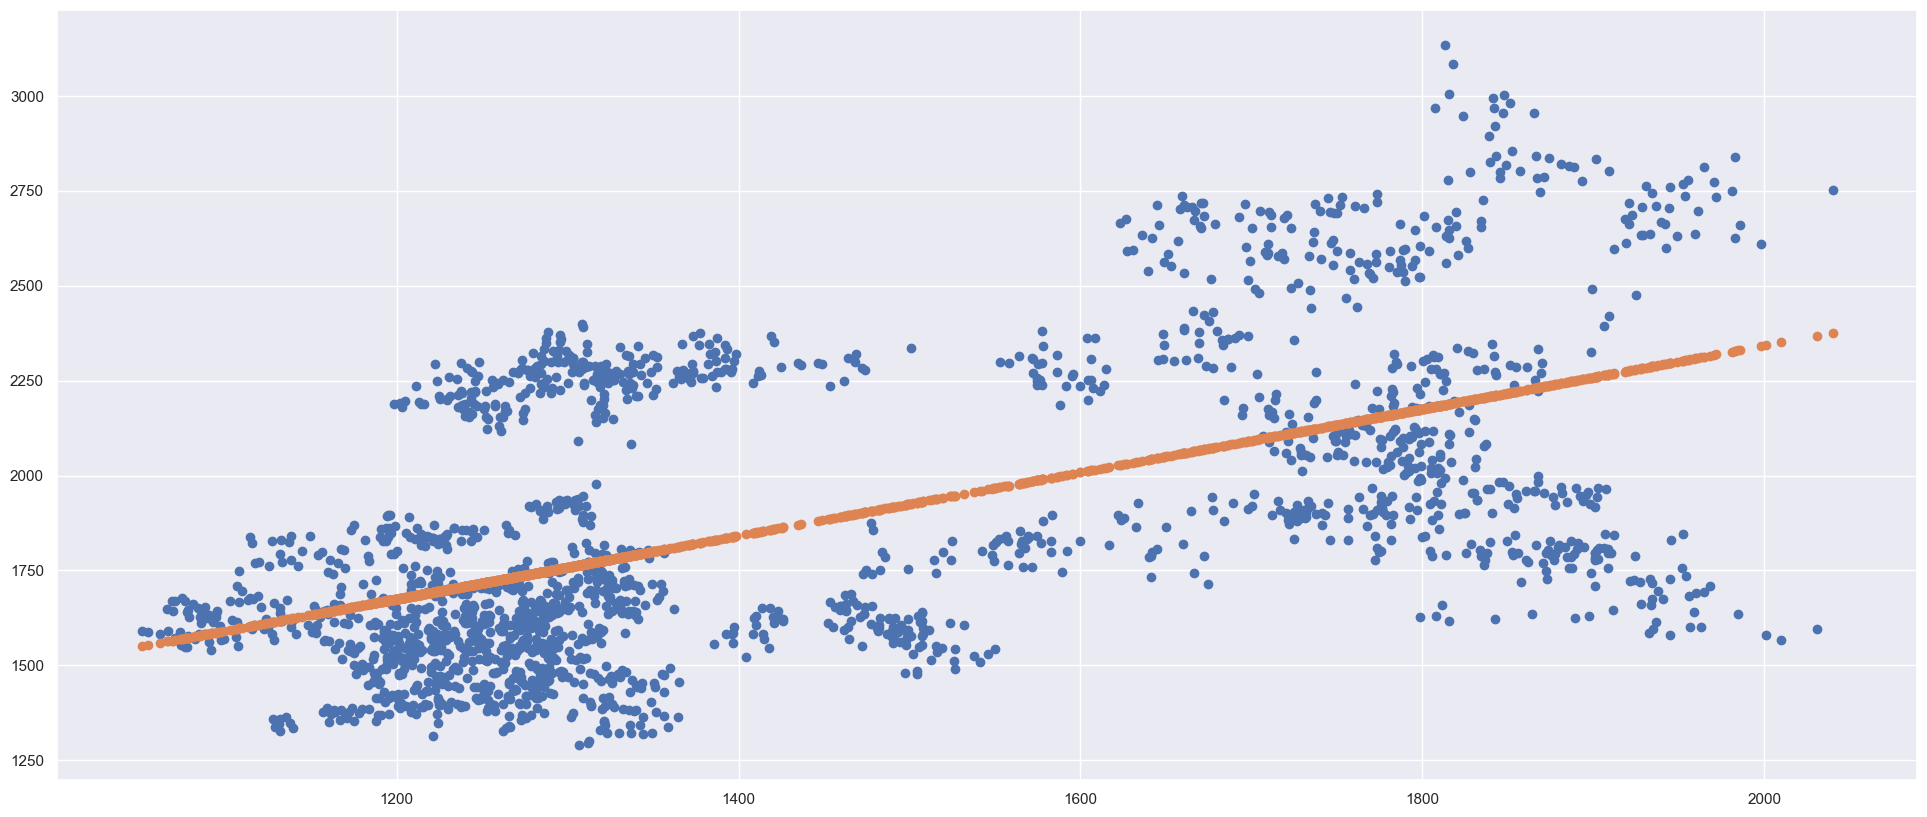

In [36]:
LinRegression(Gold, Food)

Train set: (2002, 1) (2002, 1)
Test set: (501, 1) (501, 1)

Intercept of Regression:	: b =  [3112.51353667]
Coefficients of Regression:	: a =  [[-10.43850937]]

Train Set - Explained Variance (R^2)	: 0.013843196670363156

Test Set Metrics
Mean Squared Error (MSE) 	: 148420.6264162137
Root Mean Squared Error (RMSE) 	: 385.2539765092811




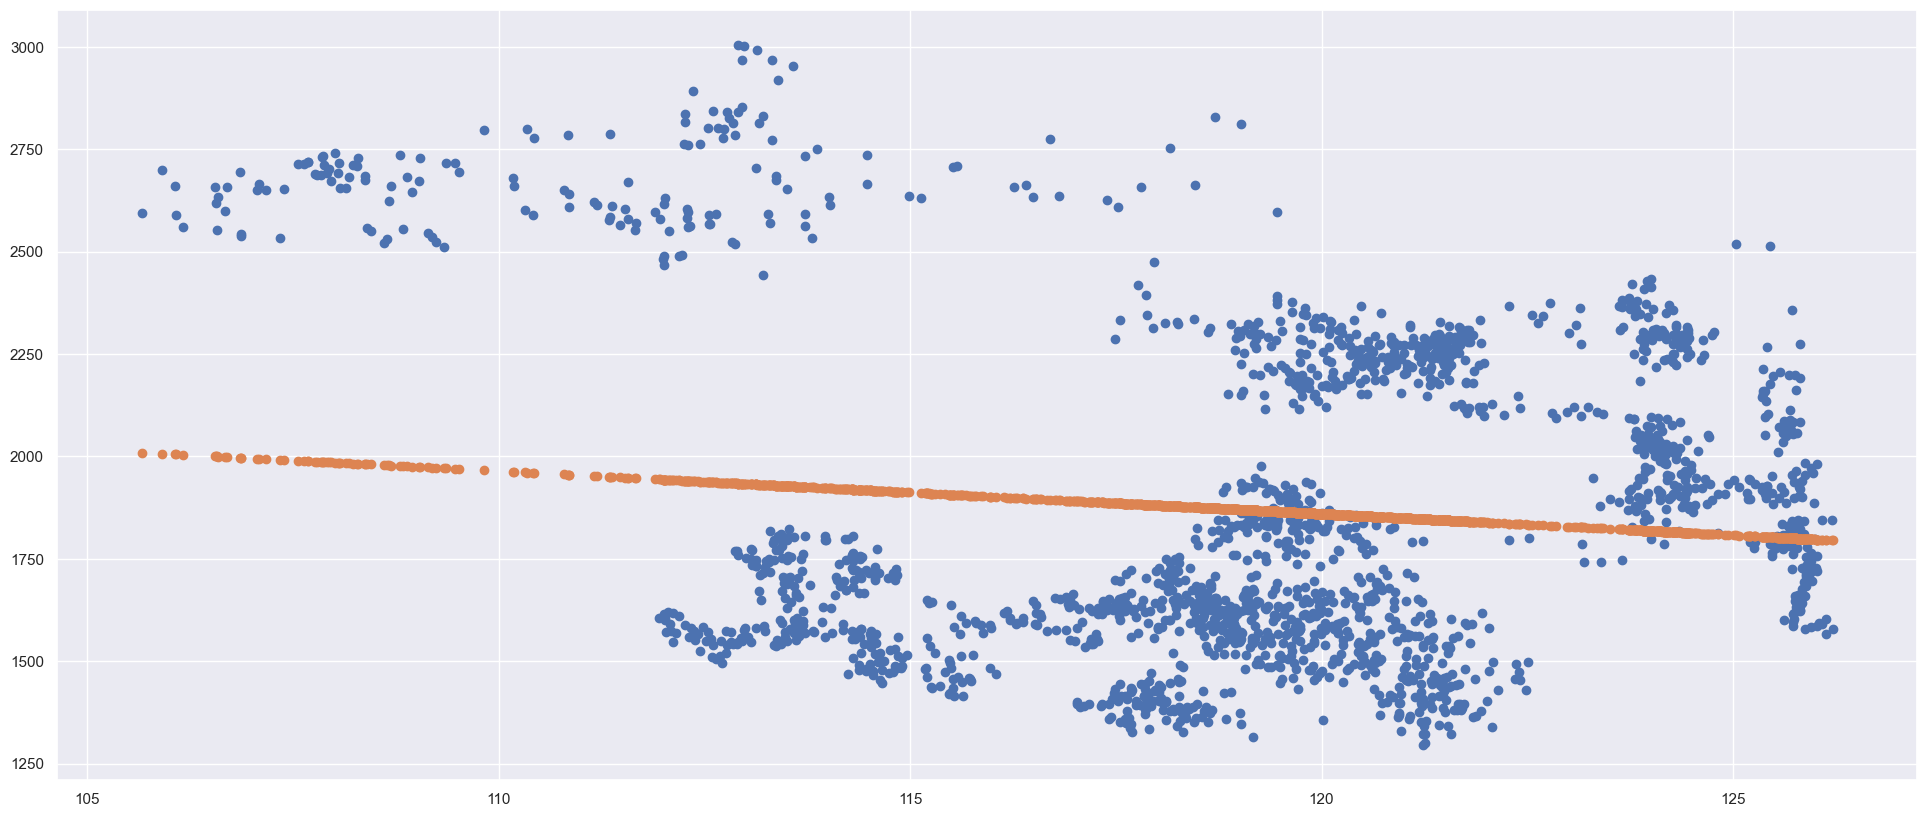

In [37]:
LinRegression(Bonds, Food)

Train set: (2002, 1) (2002, 1)
Test set: (501, 1) (501, 1)

Intercept of Regression:	: b =  [1492.86481245]
Coefficients of Regression:	: a =  [[12.31783287]]

Train Set - Explained Variance (R^2)	: 0.3690401100032744

Test Set Metrics
Mean Squared Error (MSE) 	: 91127.61505701889
Root Mean Squared Error (RMSE) 	: 301.8735083723295




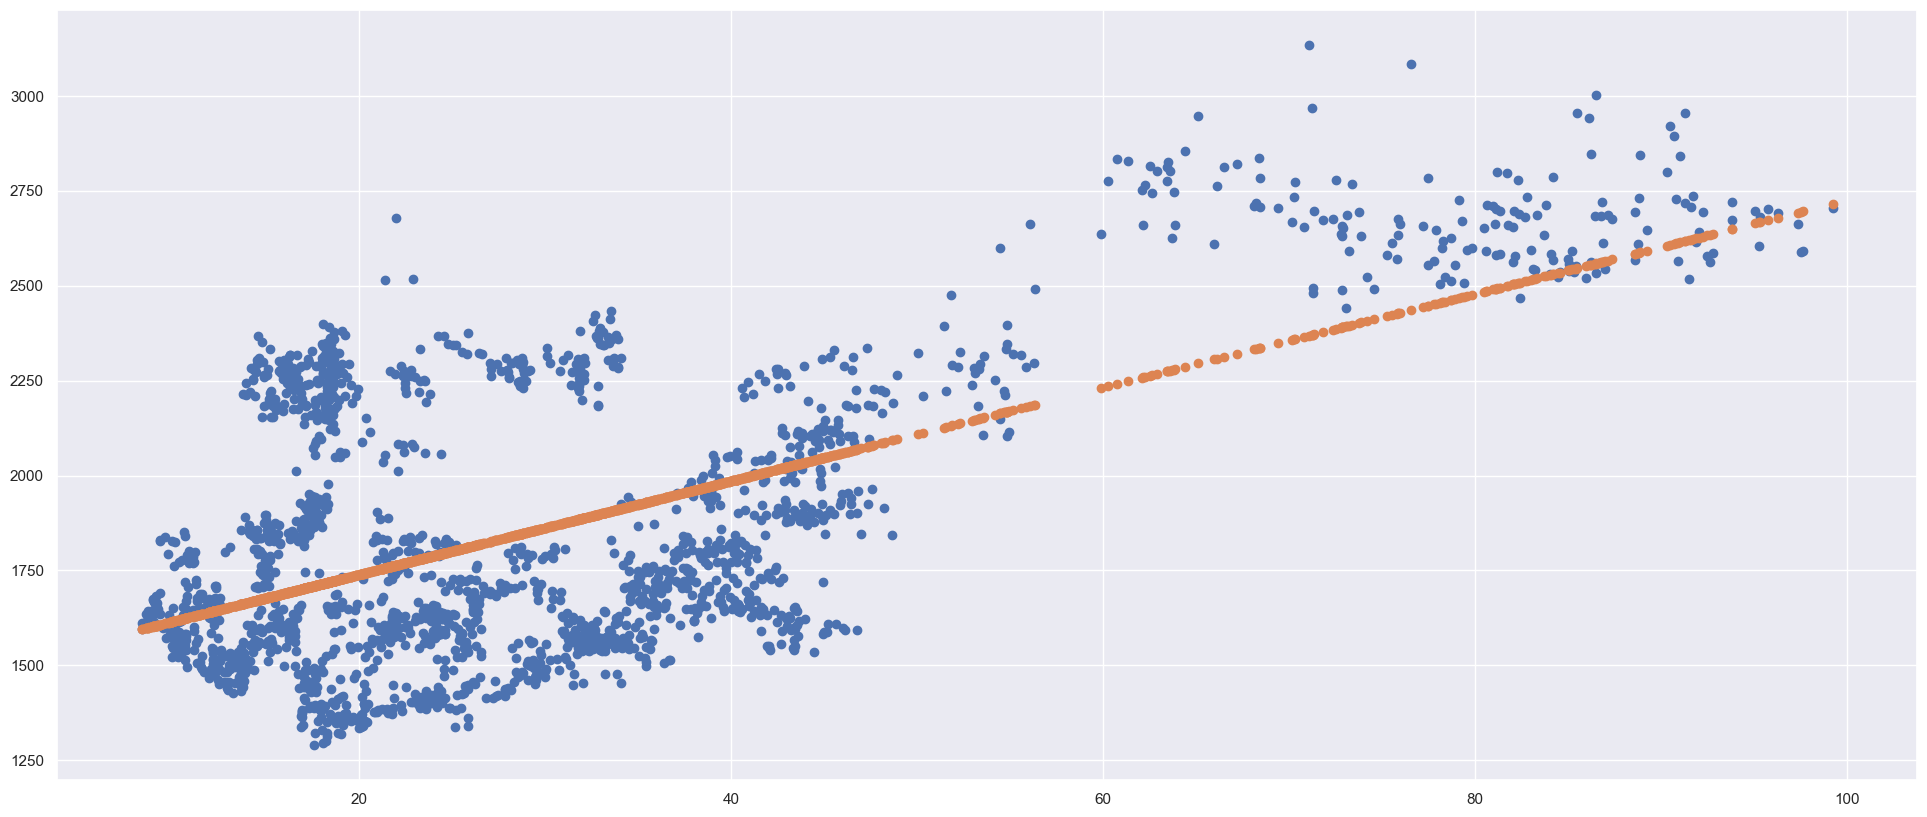

In [38]:
LinRegression(Fert, Food)

Train set: (2002, 1) (2002, 1)
Test set: (501, 1) (501, 1)

Intercept of Regression:	: b =  [1050.93068445]
Coefficients of Regression:	: a =  [[12.42826736]]

Train Set - Explained Variance (R^2)	: 0.5603168040424027

Test Set Metrics
Mean Squared Error (MSE) 	: 59550.097450508656
Root Mean Squared Error (RMSE) 	: 244.02888650835715




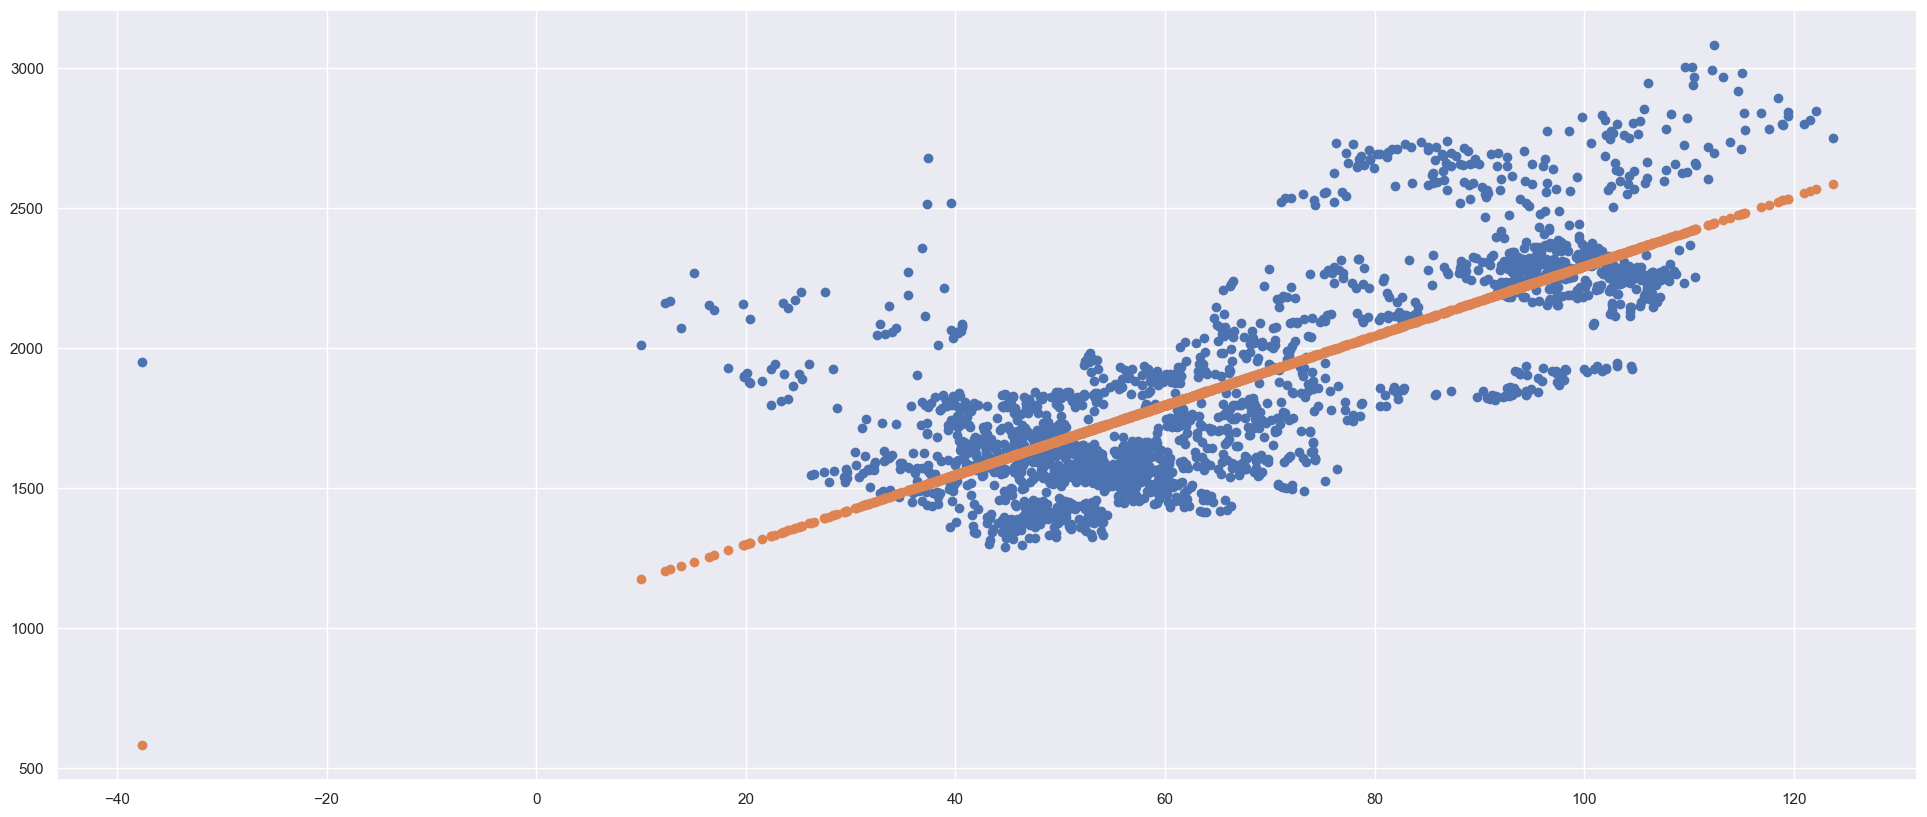

In [39]:
LinRegression(Crude, Food)

Train set: (2002, 1) (2002, 1)
Test set: (501, 1) (501, 1)

Intercept of Regression:	: b =  [1173.26051172]
Coefficients of Regression:	: a =  [[202.89345353]]

Train Set - Explained Variance (R^2)	: 0.5591813927107272

Test Set Metrics
Mean Squared Error (MSE) 	: 62633.90920178649
Root Mean Squared Error (RMSE) 	: 250.26767510365076




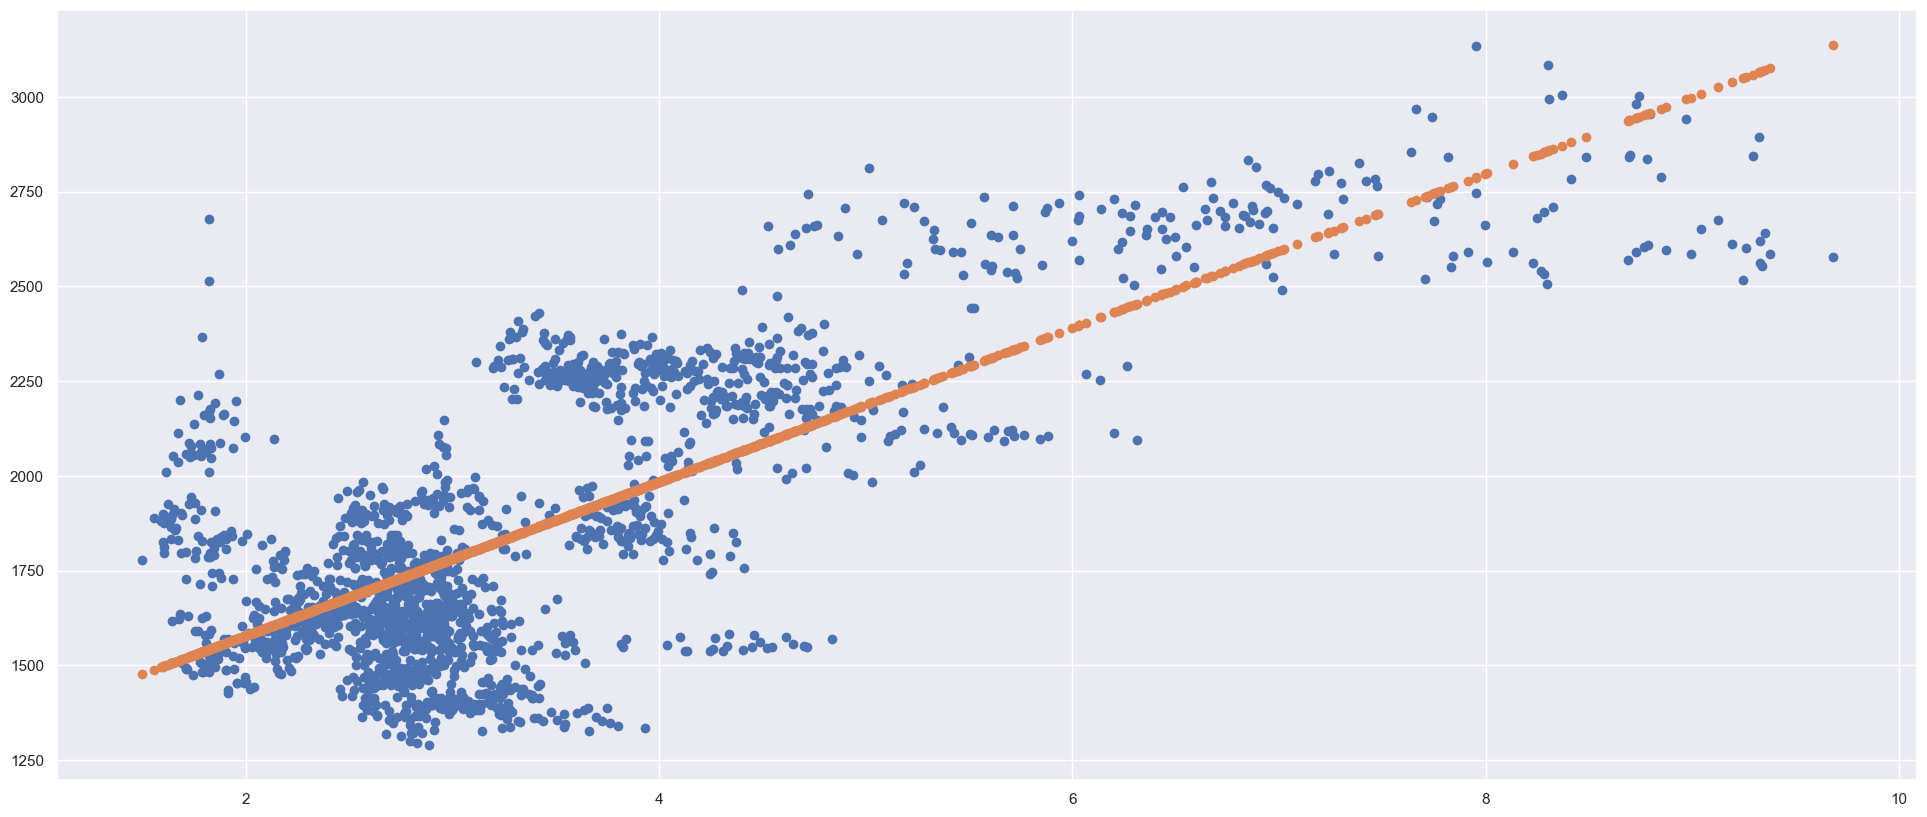

In [40]:
LinRegression(Nat, Food)

Train set: (2002, 1) (2002, 1)
Test set: (501, 1) (501, 1)

Intercept of Regression:	: b =  [1724.18294987]
Coefficients of Regression:	: a =  [[2.01647544]]

Train Set - Explained Variance (R^2)	: 0.2962455494209276

Test Set Metrics
Mean Squared Error (MSE) 	: 96970.02659468255
Root Mean Squared Error (RMSE) 	: 311.40010692785984




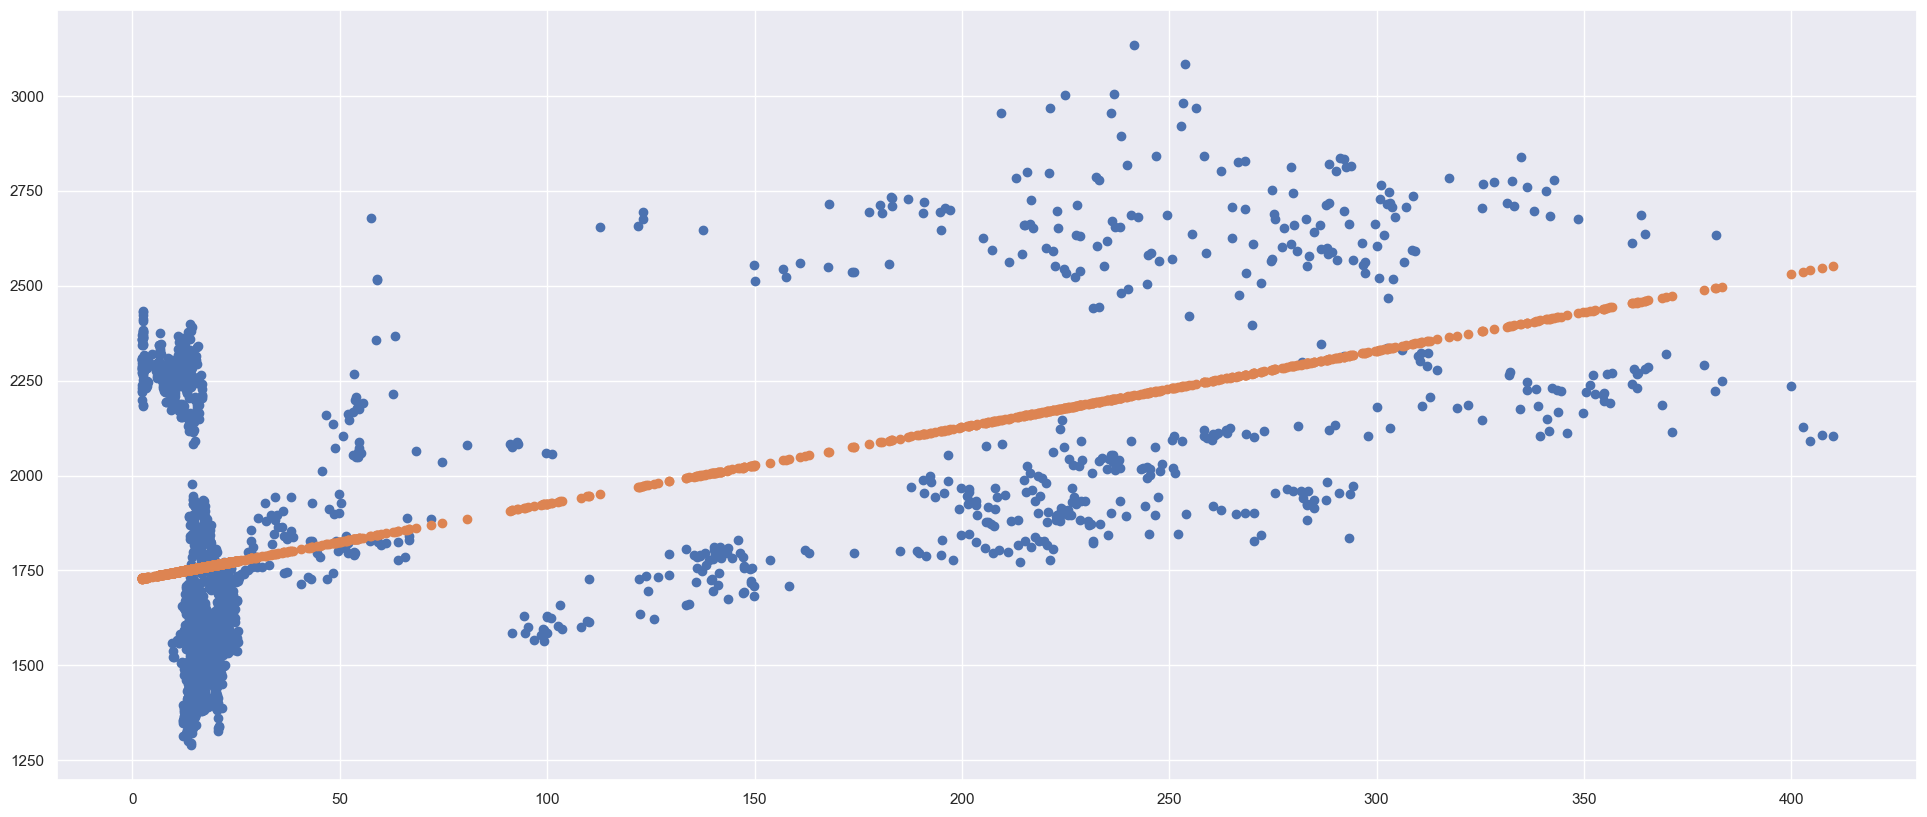

In [41]:
LinRegression(Tesla, Food)

Train set: (2002, 1) (2002, 1)
Test set: (501, 1) (501, 1)

Intercept of Regression:	: b =  [1446.83226709]
Coefficients of Regression:	: a =  [[0.00147545]]

Train Set - Explained Variance (R^2)	: 0.1280853482722597

Test Set Metrics
Mean Squared Error (MSE) 	: 125446.11280942292
Root Mean Squared Error (RMSE) 	: 354.18372747688863




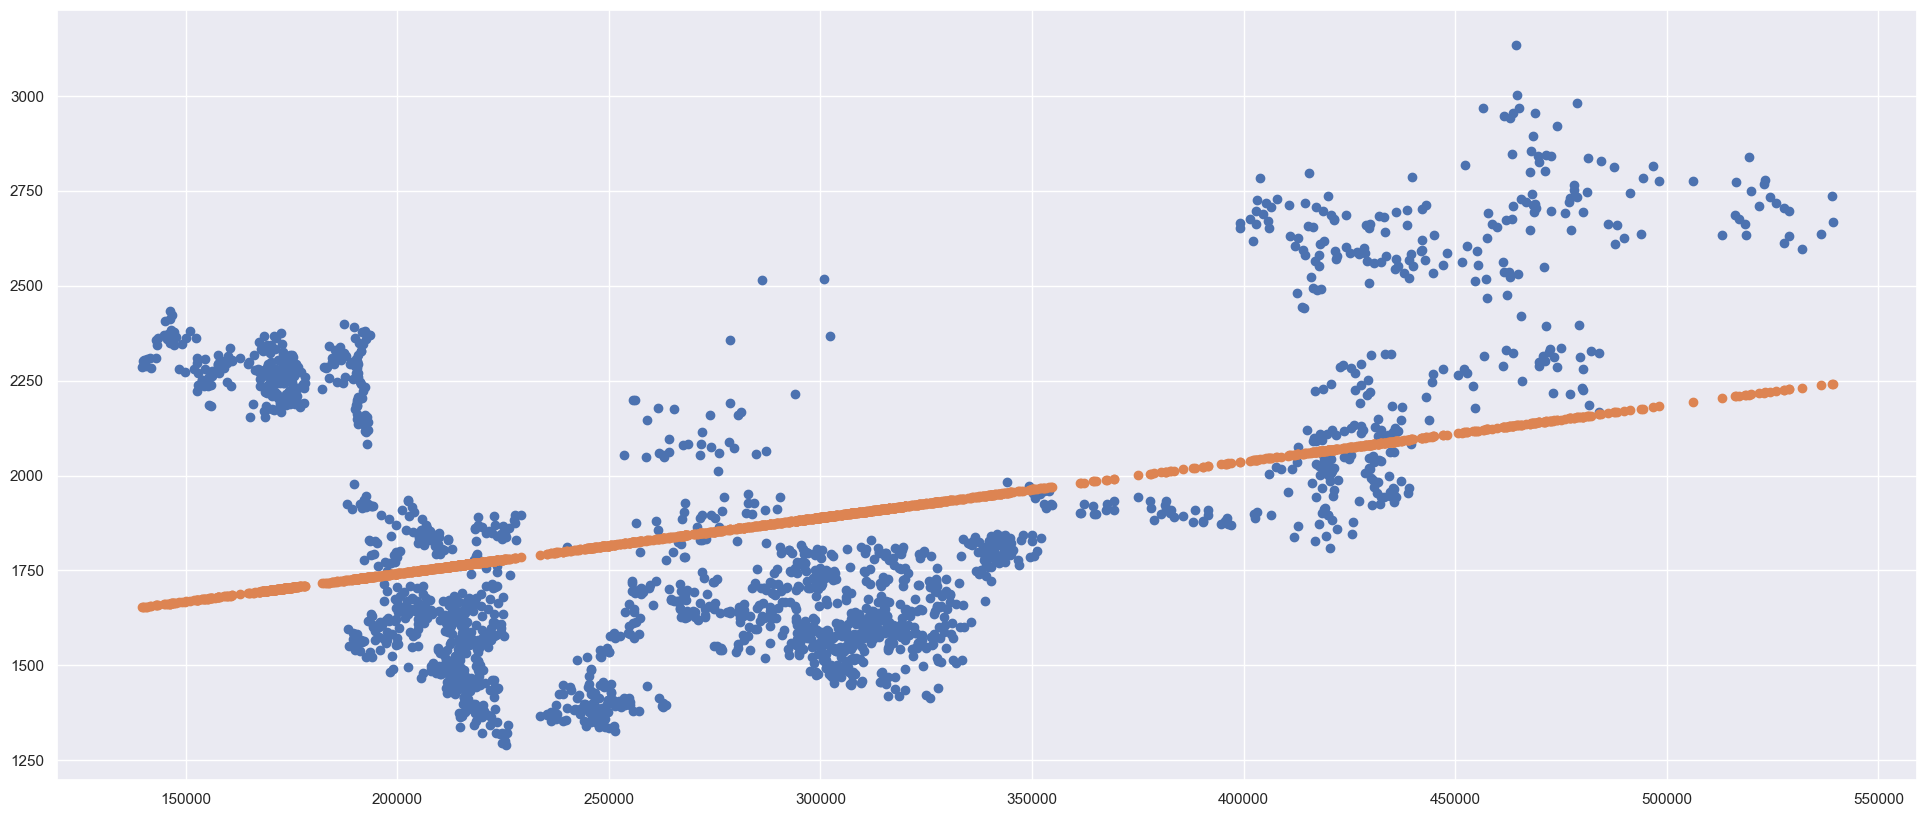

In [42]:
LinRegression(Berkshire, Food)

### Multivariate 